In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/y1.csv")
df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,Tuesday,21,3,2023,14,2,26,2,26,...,2,1,4,24,1,1,4,15,2,1
1,Train,Friday,30,6,2023,18,4,6,3,17,...,1,9,3,24,2,1,2,14,4,1
2,Train,Tuesday,5,9,2023,27,1,11,2,3,...,3,9,1,24,1,1,1,14,3,1
3,Test,Friday,15,3,2024,14,1,25,4,4,...,2,24,2,24,4,27,2,13,4,1
4,Test,Tuesday,2,4,2024,14,2,27,1,21,...,4,25,4,24,4,27,2,13,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Train_Test     160 non-null    object
 1   Weekday        160 non-null    object
 2   Date           160 non-null    int64 
 3   Month          160 non-null    int64 
 4   Year           160 non-null    int64 
 5   Lagna          160 non-null    int64 
 6   Lagna Padam    160 non-null    int64 
 7   Sun            160 non-null    int64 
 8   Sun Padam      160 non-null    int64 
 9   Moon           160 non-null    int64 
 10  Moon Padam     160 non-null    int64 
 11  Mars           160 non-null    int64 
 12  Mars Padam     160 non-null    int64 
 13  Mercury        160 non-null    int64 
 14  Mercury Padam  160 non-null    int64 
 15  Jupiter        160 non-null    int64 
 16  Jupiter Padam  160 non-null    int64 
 17  Venus          160 non-null    int64 
 18  Venus Padam    160 non-null   

In [4]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["Year"] = encoding.fit_transform(df["Year"])

In [5]:
# 0 means Friday; 1 means Tuesday
# 0 means 2023; 1 means 2024

df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,21,3,0,14,2,26,2,26,...,2,1,4,24,1,1,4,15,2,1
1,Train,0,30,6,0,18,4,6,3,17,...,1,9,3,24,2,1,2,14,4,1
2,Train,1,5,9,0,27,1,11,2,3,...,3,9,1,24,1,1,1,14,3,1
3,Test,0,15,3,1,14,1,25,4,4,...,2,24,2,24,4,27,2,13,4,1
4,Test,1,2,4,1,14,2,27,1,21,...,4,25,4,24,4,27,2,13,4,1


In [6]:
df_train = df[df['Train_Test'] == 'Train']
df_test = df[df['Train_Test'] == 'Test']

In [7]:
df_train.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,21,3,0,14,2,26,2,26,...,2,1,4,24,1,1,4,15,2,1
1,Train,0,30,6,0,18,4,6,3,17,...,1,9,3,24,2,1,2,14,4,1
2,Train,1,5,9,0,27,1,11,2,3,...,3,9,1,24,1,1,1,14,3,1
5,Train,0,3,2,0,12,1,22,4,7,...,3,24,3,23,3,2,1,15,3,2
6,Train,1,7,2,0,12,2,23,1,11,...,3,25,1,23,3,2,1,15,3,2


In [8]:
df_test.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
3,Test,0,15,3,1,14,1,25,4,4,...,2,24,2,24,4,27,2,13,4,1
4,Test,1,2,4,1,14,2,27,1,21,...,4,25,4,24,4,27,2,13,4,1
21,Test,0,14,6,1,18,1,5,3,12,...,1,5,3,25,2,27,1,13,3,2
22,Test,1,2,7,1,19,1,6,4,3,...,2,7,2,25,2,27,1,13,3,2
23,Test,1,16,7,1,20,1,7,4,16,...,3,8,3,25,2,26,4,13,2,2


In [9]:
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [10]:
df_train.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,21,3,0,14,2,26,2,26,...,2,1,4,24,1,1,4,15,2,1
1,Train,0,30,6,0,18,4,6,3,17,...,1,9,3,24,2,1,2,14,4,1
2,Train,1,5,9,0,27,1,11,2,3,...,3,9,1,24,1,1,1,14,3,1
3,Train,0,3,2,0,12,1,22,4,7,...,3,24,3,23,3,2,1,15,3,2
4,Train,1,7,2,0,12,2,23,1,11,...,3,25,1,23,3,2,1,15,3,2


In [11]:
df_test.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Test,0,15,3,1,14,1,25,4,4,...,2,24,2,24,4,27,2,13,4,1
1,Test,1,2,4,1,14,2,27,1,21,...,4,25,4,24,4,27,2,13,4,1
2,Test,0,14,6,1,18,1,5,3,12,...,1,5,3,25,2,27,1,13,3,2
3,Test,1,2,7,1,19,1,6,4,3,...,2,7,2,25,2,27,1,13,3,2
4,Test,1,16,7,1,20,1,7,4,16,...,3,8,3,25,2,26,4,13,2,2


In [12]:
df_train.drop(labels='Train_Test', axis=1, inplace=True)
df_test.drop(labels='Train_Test', axis=1, inplace=True)

In [13]:
df_train.head()

,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,Moon Padam,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,1,21,3,0,14,2,26,2,26,2,...,2,1,4,24,1,1,4,15,2,1
1,0,30,6,0,18,4,6,3,17,2,...,1,9,3,24,2,1,2,14,4,1
2,1,5,9,0,27,1,11,2,3,3,...,3,9,1,24,1,1,1,14,3,1
3,0,3,2,0,12,1,22,4,7,3,...,3,24,3,23,3,2,1,15,3,2
4,1,7,2,0,12,2,23,1,11,2,...,3,25,1,23,3,2,1,15,3,2


In [14]:
df_test.head()

,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,Moon Padam,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,0,15,3,1,14,1,25,4,4,2,...,2,24,2,24,4,27,2,13,4,1
1,1,2,4,1,14,2,27,1,21,1,...,4,25,4,24,4,27,2,13,4,1
2,0,14,6,1,18,1,5,3,12,3,...,1,5,3,25,2,27,1,13,3,2
3,1,2,7,1,19,1,6,4,3,4,...,2,7,2,25,2,27,1,13,3,2
4,1,16,7,1,20,1,7,4,16,4,...,3,8,3,25,2,26,4,13,2,2


In [15]:
# X_train_notscaled, y_train = df_train[["Weekday","Date","Month","Year","Lagna","Lagna Padam","Sun","Sun Padam","Moon","Moon Padam","Mars","Mars Padam","Mercury","Mercury Padam","Jupiter","Jupiter Padam","Venus","Venus Padam","Saturn","Saturn Padam","Rahu","Rahu Padam","Ketu","Ketu Padam"]], df_train["y1"]
# X_train_notscaled.shape, y_train.shape

((122, 24), (122,))

In [16]:
# X_test_notscaled, y_test = df_test[["Weekday","Date","Month","Year","Lagna","Lagna Padam","Sun","Sun Padam","Moon","Moon Padam","Mars","Mars Padam","Mercury","Mercury Padam","Jupiter","Jupiter Padam","Venus","Venus Padam","Saturn","Saturn Padam","Rahu","Rahu Padam","Ketu","Ketu Padam"]], df_test["y1"]
# X_test_notscaled.shape, y_test.shape

((38, 24), (38,))

In [42]:
X_train_notscaled, y_train = df_train[["Sun Padam","Moon","Moon Padam","Mars","Venus Padam"]], df_train["y1"]
X_train_notscaled.shape, y_train.shape

((122, 5), (122,))

In [43]:
X_test_notscaled, y_test = df_test[["Sun Padam","Moon","Moon Padam","Mars","Venus Padam"]], df_test["y1"]
X_test_notscaled.shape, y_test.shape

((38, 5), (38,))

In [44]:
X_train_scaled = pd.DataFrame(minmax_scale(X_train_notscaled), columns=X_train_notscaled.columns)
X_train_scaled.head()

,Sun Padam,Moon,Moon Padam,Mars,Venus Padam
0,0.333333,0.961538,0.333333,0.043478,1.000000
1,0.666667,0.615385,0.333333,0.217391,0.666667
2,0.333333,0.076923,0.666667,0.391304,0.000000
3,1.000000,0.230769,0.666667,0.000000,0.666667
4,0.000000,0.384615,0.333333,0.000000,0.000000


In [45]:
X_test_scaled = pd.DataFrame(minmax_scale(X_test_notscaled), columns=X_test_notscaled.columns)
X_test_scaled.head()

,Sun Padam,Moon,Moon Padam,Mars,Venus Padam
0,1.000000,0.043478,0.333333,0.846154,0.333333
1,0.000000,0.782609,0.000000,0.884615,1.000000
2,0.666667,0.391304,0.666667,0.000000,0.666667
3,1.000000,0.000000,1.000000,0.038462,0.333333
4,1.000000,0.565217,1.000000,0.076923,0.666667


In [58]:
model_dt=DecisionTreeClassifier(criterion="entropy", max_depth=9, max_leaf_nodes=97)
model_dt.fit(X_train_scaled, y_train)
model_dt.score(X_train_scaled, y_train), model_dt.score(X_test_scaled, y_test)

(1.0, 0.05263157894736842)

In [59]:
y_predict = model_dt.predict(X_test_scaled)

In [60]:
accuracy_score(y_test, y_predict)

0.05263157894736842

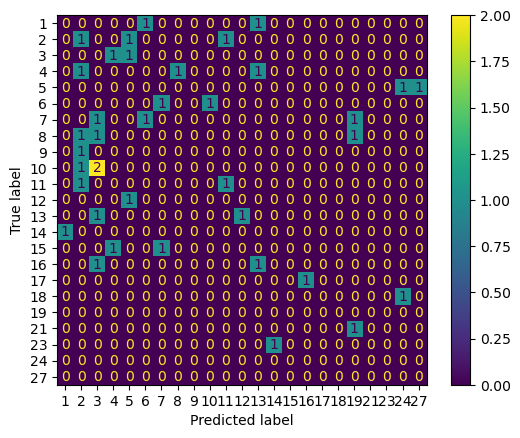

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, model_dt.predict(X_test_scaled))
plt.show()

In [62]:
model_dt.get_depth(), model_dt.get_n_leaves()

(9, 97)

In [63]:
X_train_scaled.columns

Index(['Sun Padam', 'Moon', 'Moon Padam', 'Mars', 'Venus Padam'], dtype='object')

In [64]:
model_dt.feature_importances_

array([0.13112141, 0.24355057, 0.12759114, 0.32629633, 0.17144055])

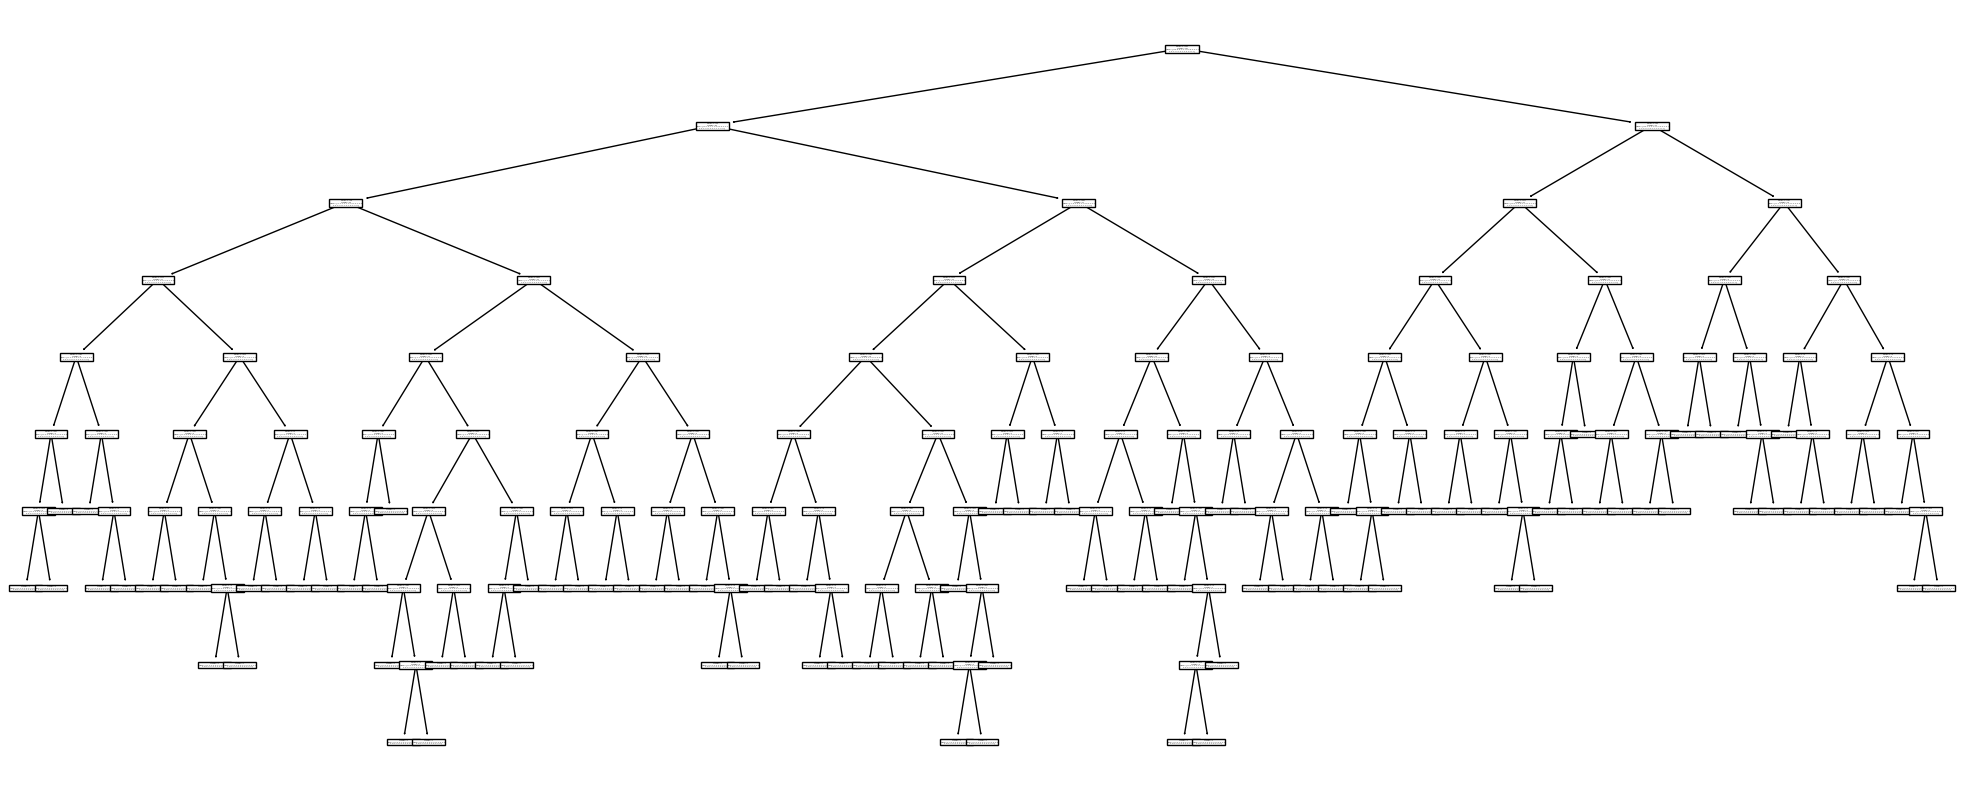

In [66]:
plt.figure(figsize=[25,10])
plot_tree(model_dt, feature_names=X_train_scaled.columns)
plt.show()